Agenda

1. Daily vs Cumulative Cases
2. Top Affected Countries
3. Death Rate Calculation
4. Trend Analysis with Line Plots

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid19_dataset.csv')
df.head()


,Date,Country,Confirmed_Cases,Deaths,Recovered,Active_Cases,Tests_Conducted,Vaccinations
0,1/1/2020,Germany,228604,9160,122308,36330,752393,562473
1,1/2/2020,UK,121929,1100,111718,49180,1015348,350068
2,1/3/2020,France,128477,6652,454468,100556,1694481,262048
3,1/4/2020,Pakistan,471727,8632,386378,80211,826992,991921
4,1/5/2020,Germany,1722,7421,424016,8650,1889873,780862


In [6]:
df['Date'].dtype

dtype('O')

In [7]:
# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Daily Confirmed Cases

df[['Date','Country','Confirmed_Cases']].head()

,Date,Country,Confirmed_Cases
0,2020-01-01,Germany,228604
1,2020-01-02,UK,121929
2,2020-01-03,France,128477
3,2020-01-04,Pakistan,471727
4,2020-01-05,Germany,1722


In [10]:
# Cumulative Case by Country

df['Cumulative_Cases'] = df.groupby('Country')['Confirmed_Cases'].cumsum()
df['Cumulative_Cases']
df.head()

,Date,Country,Confirmed_Cases,Deaths,Recovered,Active_Cases,Tests_Conducted,Vaccinations,Cumulative_Cases
0,2020-01-01,Germany,228604,9160,122308,36330,752393,562473,228604
1,2020-01-02,UK,121929,1100,111718,49180,1015348,350068,121929
2,2020-01-03,France,128477,6652,454468,100556,1694481,262048,128477
3,2020-01-04,Pakistan,471727,8632,386378,80211,826992,991921,471727
4,2020-01-05,Germany,1722,7421,424016,8650,1889873,780862,230326


In [11]:
# Top Affected Country (Total Cases)

top_countries = (
    df.groupby('Country')['Confirmed_Cases']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print(top_countries)

Country
USA         35430026
China       31743508
Pakistan    30857491
Brazil      30619933
Italy       30149005
India       29968903
Germany     29912320
UK          28473360
France      28184437
Spain       25802961
Name: Confirmed_Cases, dtype: int64


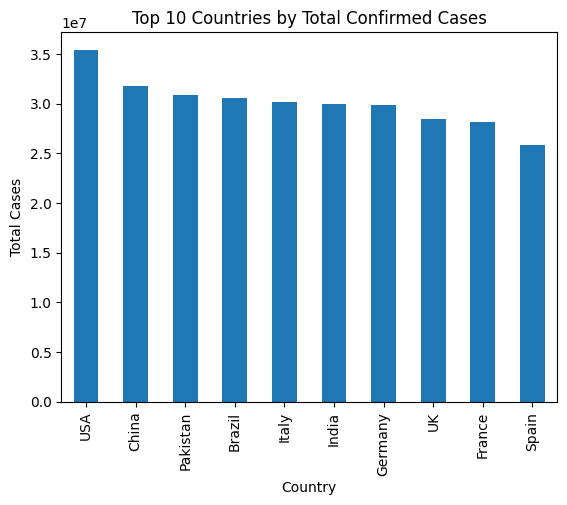

In [13]:
# Chart for Top Affected Country (Total Cases)

import matplotlib.pyplot as plt

top_countries.plot(kind = 'bar')
plt.title('Top 10 Countries by Total Confirmed Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.show()

In [ ]:
# Death Rate Calculation

# Formula : Death Rate (%) = Total Death / Total Confirmed Cases x 100

In [21]:
summary = df.groupby('Country')[['Confirmed_Cases', 'Deaths']].sum()
summary['Death_Rate (%)'] = (summary['Deaths'] / summary['Confirmed_Cases']) * 100
summary.sort_values('Death_Rate (%)' , ascending= False ).head(10)

,Confirmed_Cases,Deaths,Death_Rate (%)
Country,,,
Spain,25802961,577928,2.239774
Brazil,30619933,653982,2.135805
France,28184437,584717,2.074609
Pakistan,30857491,629156,2.038908
Germany,29912320,589447,1.970583
Italy,30149005,586885,1.946615
USA,35430026,689343,1.945646
India,29968903,554173,1.849160
UK,28473360,515968,1.812108


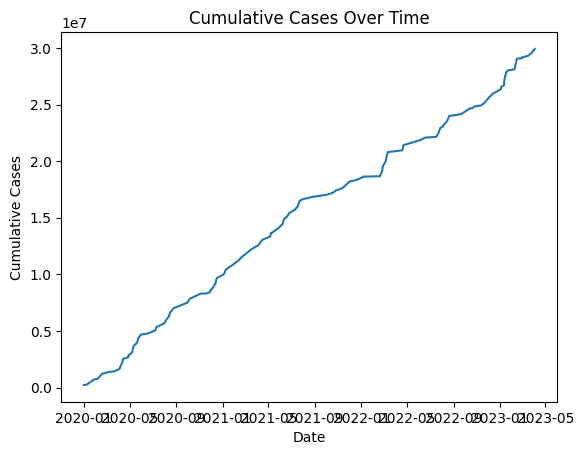

In [22]:
# Trend Analysis with Line Plots

country = 'Germany'
country_df = df[df['Country'] == country]

plt.plot(country_df['Date'],country_df['Cumulative_Cases'])
plt.title('Cumulative Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.show()


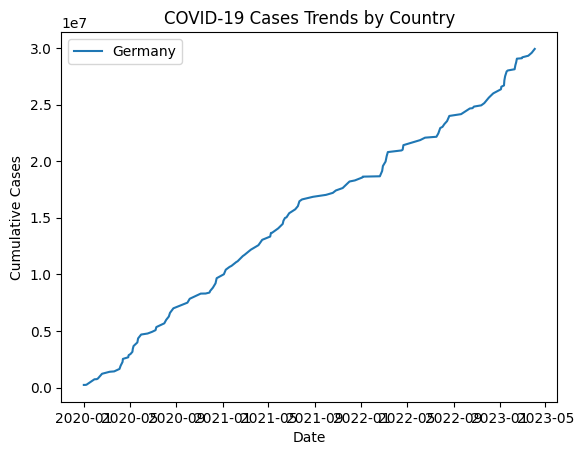

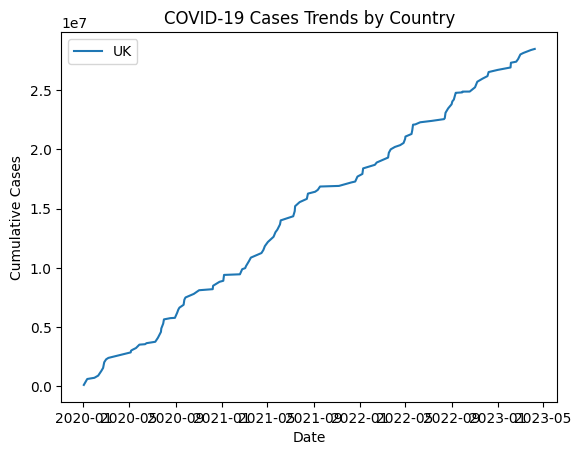

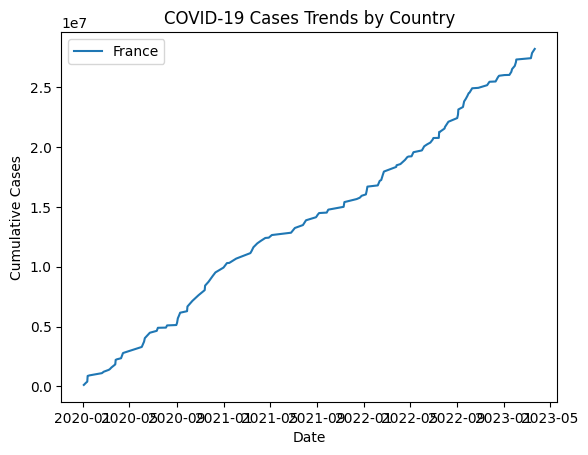

In [25]:
# Compare Countries

countries = ['Germany','UK','France']

for c in countries:
  temp = df[df['Country'] == c]
  plt.plot(temp['Date'],temp['Cumulative_Cases'],label = c)

  plt.legend()
  plt.title('COVID-19 Cases Trends by Country')
  plt.xlabel('Date')
  plt.ylabel('Cumulative Cases')
  plt.show()